# Solve linear equations with scipy

In [17]:
from scipy import linalg
import numpy as np
# Solving an equation with linalg
# 3x + 2y + 0z = 2
#  x -  y + 0z = 4
# 0x + 5y +  z = -1

a = np.array([
    [3, 2, 0], 
    [1, -1, 0],
    [0, 5, 1]
])

b = np.array([
    2,
    4,
    -1
])

print(a)
print(b)

x,y,z = linalg.solve(a, b)
print(f"x={x} y={y} z={z}")

[[ 3  2  0]
 [ 1 -1  0]
 [ 0  5  1]]
[ 2  4 -1]
x=2.0 y=-2.0 z=9.0


# MNIST DATASET

In [1]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [2]:
print(y[0:10])
print("X",X.shape)
print("y", y.shape)

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']
X (70000, 784)
y (70000,)


In [ ]:
# X -> Features for all samples
# y -> GroundTruth, Target

In [3]:
imgIndex = 50
img = X[imgIndex].reshape((28,28))
img.shape

(28, 28)

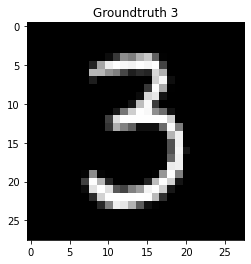

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title(f"Groundtruth {y[imgIndex]}")
plt.imshow(img, cmap="gray")

In [5]:
# CLASIFICACIÓN: Supervised Learning (predict with groundthuth)

# Encontrar un modelo matemático, que nos permita predecir
# que numero hay en una imagen (28x28 pixeles = 784 dimensiones)
# y dicho modelo debe ser generalista para los 70000 samples

# La equación de una recta en dimensión N:
# y = a*x[0] + b*x[1] + c*x[2] + ..... + n*x[n]+c

# a,b,c,d,etc. are constants that will be equal on all 70000 equations
# With real image data:
# 3 = 5*255 + 8.33*54 + .....
# 6 = 5*201 + 8.33*39 + .....



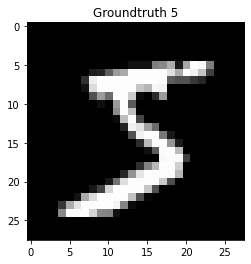

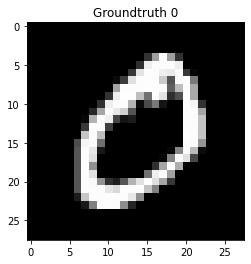

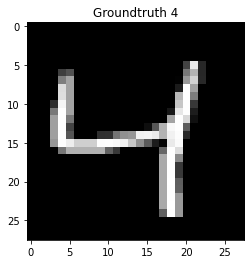

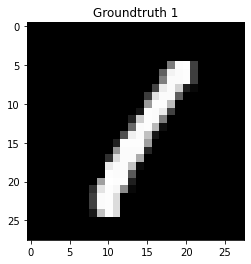

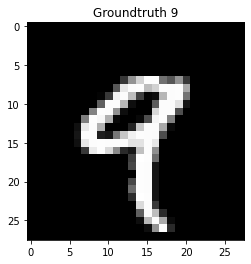

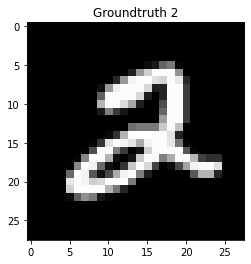

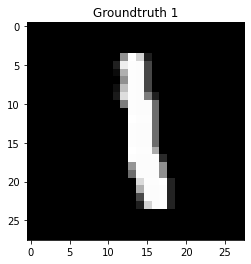

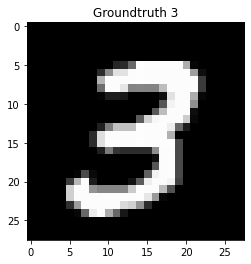

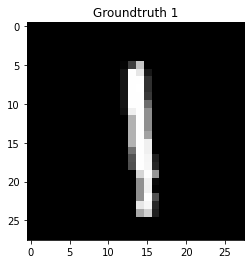

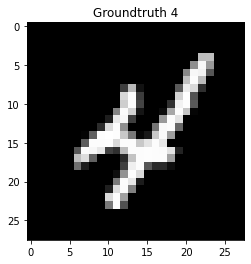

In [6]:
for i in range(10):
    img = X[i].reshape((28,28))
    plt.figure()
    plt.title(f"Groundtruth {y[i]}")
    plt.imshow(img, cmap="gray")

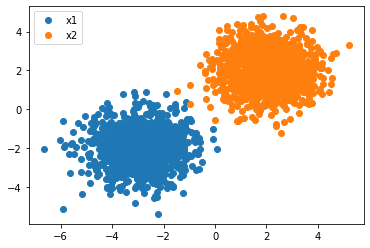

In [7]:
import numpy as np

x1 = np.random.randn(1000)-3
y1 = np.random.randn(1000)-2
plt.plot(x1,y1,'o')


x2 = np.random.randn(1000)+2
y2 = np.random.randn(1000)+2
plt.plot(x2,y2,'o')
plt.legend(["x1","x2"])

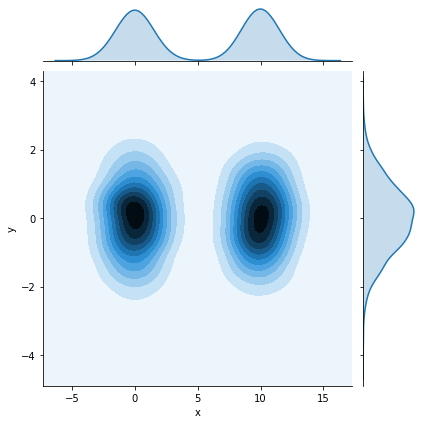

In [8]:
import seaborn as sns
import pandas as pd

xz = np.concatenate([np.random.randn(1000)+10,np.random.randn(1000)])
yz = np.concatenate([np.random.randn(1000),np.random.randn(1000)])

df = pd.DataFrame({"x":xz,"y":yz})
sns.jointplot(x="x", y="y", data=df, kind="kde");

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data2d = pca.fit_transform(X)

In [10]:
print(data2d.shape)
print(data2d)

(70000, 2)
[[ 122.25253699 -316.27844781]
 [1010.49691009 -289.95037122]
 [ -58.99844599  393.68066495]
 ...
 [-271.50524237  590.09970061]
 [-310.22303725 -116.68605352]
 [1058.86178179  -83.40554094]]


There are (7877,) images with digit 1
There are (6825,) images with digit 8
(7877, 784)
(6825, 784)


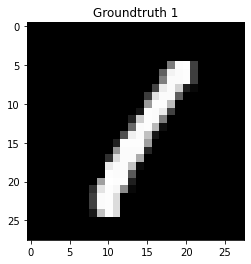

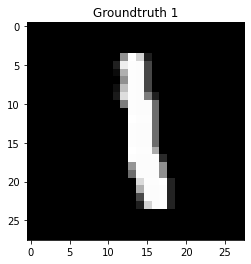

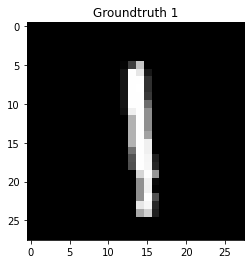

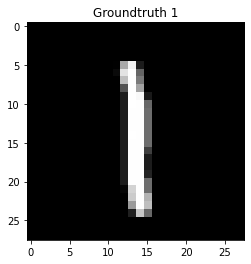

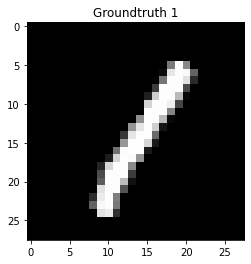

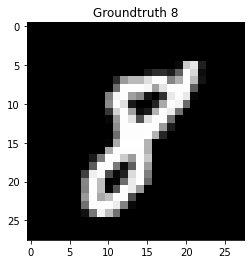

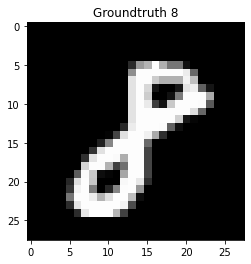

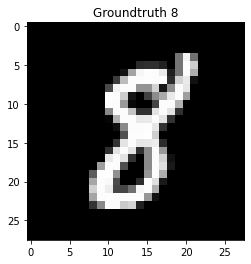

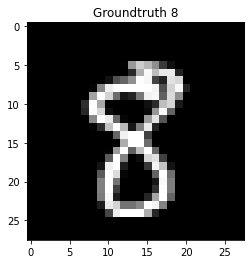

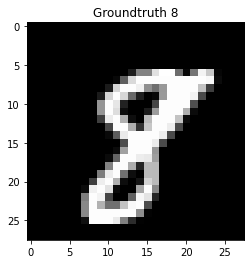

In [14]:
def plotNumber(X,idx,gt):
    img = X[idx].reshape((28,28))
    plt.figure()
    plt.title(f"Groundtruth {gt}")
    plt.imshow(img, cmap="gray")
    
def extractIndexesForDigit(X,y,digit):
    idx = np.where(y==digit)
    print(f"There are {idx[0].shape} images with digit {digit}")
    return X[idx]

ones = extractIndexesForDigit(X,y,"1")
eight = extractIndexesForDigit(X,y,"8")

print(ones.shape)
print(eight.shape)

for i in range(5):
    plotNumber(ones,i,"1")
    
for i in range(5):
    plotNumber(eight,i,"8")

In [16]:
ones_2d = extractIndexesForDigit(data2d,y,"1")
eight_2d = extractIndexesForDigit(data2d,y,"8")

print(ones_2d.shape)
print(eight_2d.shape)

There are (7877,) images with digit 1
There are (6825,) images with digit 8
(7877, 2)
(6825, 2)


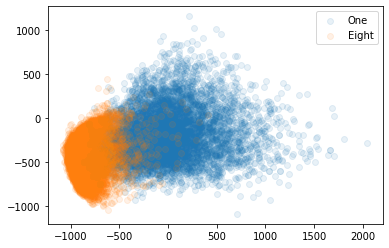

In [29]:
plt.scatter(*eight_2d.T, alpha=0.1)
plt.scatter(*ones_2d.T, alpha=0.1)
plt.legend(["One","Eight"])
# y = a*x + c

There are (6903,) images with digit 0
There are (6825,) images with digit 8


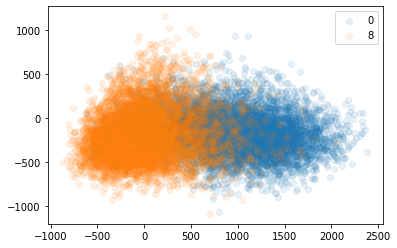

In [31]:
a = "0"
b = "8"

A_2d = extractIndexesForDigit(data2d,y,a)
B_2d = extractIndexesForDigit(data2d,y,b)


plt.scatter(*A_2d.T, alpha=0.1)
plt.scatter(*B_2d.T, alpha=0.1)
plt.legend([a,b])


There are (6824,) images with digit 4
There are (6825,) images with digit 8


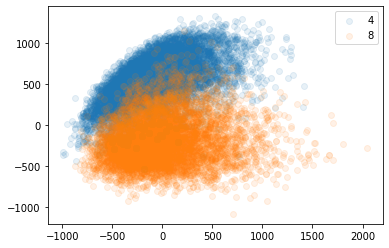

In [32]:
a = "4"
b = "8"

A_2d = extractIndexesForDigit(data2d,y,a)
B_2d = extractIndexesForDigit(data2d,y,b)


plt.scatter(*A_2d.T, alpha=0.1)
plt.scatter(*B_2d.T, alpha=0.1)
plt.legend([a,b])


There are (7293,) images with digit 7
There are (6958,) images with digit 9


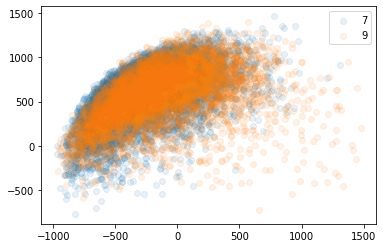

In [33]:
a = "7"
b = "9"

A_2d = extractIndexesForDigit(data2d,y,a)
B_2d = extractIndexesForDigit(data2d,y,b)


plt.scatter(*A_2d.T, alpha=0.1)
plt.scatter(*B_2d.T, alpha=0.1)
plt.legend([a,b])

In [ ]:
a = "7"
b = "9"

A_2d = extractIndexesForDigit(data2d,y,a)
B_2d = extractIndexesForDigit(data2d,y,b)


plt.scatter(*A_2d.T, alpha=0.1)
plt.scatter(*B_2d.T, alpha=0.1)
plt.legend([a,b])

There are (6903,) images with digit 0
There are (7877,) images with digit 1
There are (6990,) images with digit 2
There are (7141,) images with digit 3
There are (6824,) images with digit 4
There are (6313,) images with digit 5
There are (6876,) images with digit 6
There are (7293,) images with digit 7
There are (6825,) images with digit 8
There are (6958,) images with digit 9


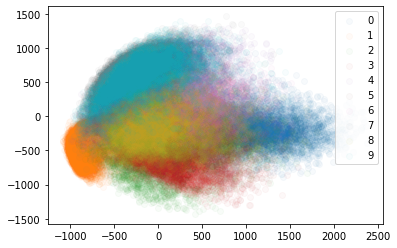

In [36]:
a = [str(i) for i in range(10)]
for e in a:
    A_2d = extractIndexesForDigit(data2d,y,e)
    plt.scatter(*A_2d.T, alpha=0.03)
plt.legend(a)

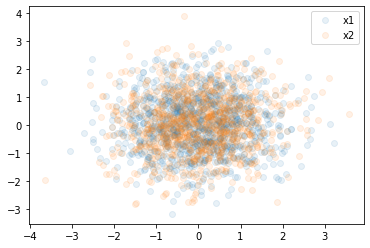

In [46]:
x1 = np.random.randn(1000)
y1 = np.random.randn(1000)
plt.plot(x1,y1,'o',alpha=0.1)

x2 = np.random.randn(1000)
y2 = np.random.randn(1000)
plt.plot(x2,y2,'o',alpha=0.1)
plt.legend(["x1","x2"])